<a href="https://colab.research.google.com/github/shouvikpal8991/Assignment-3/blob/main/Assig3pr1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

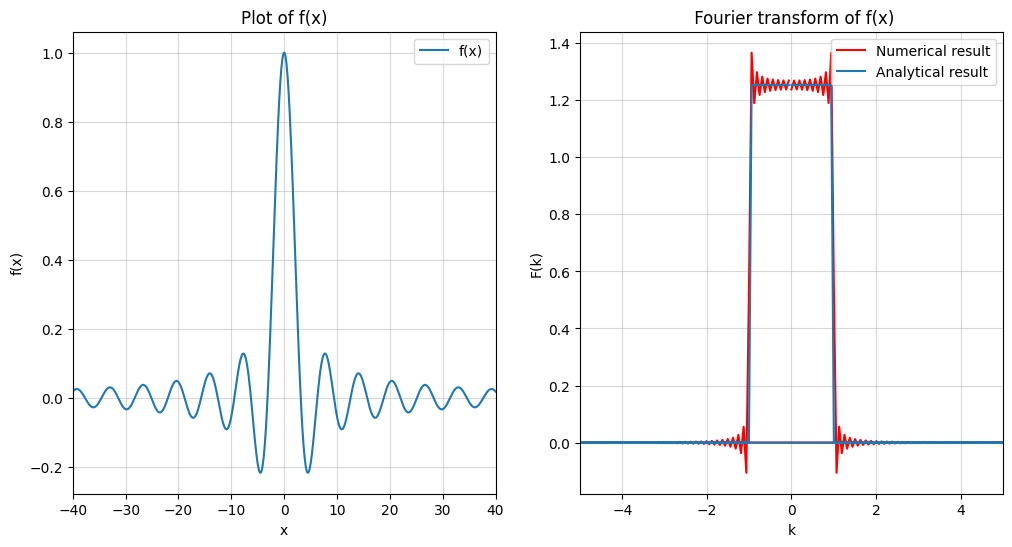

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  if x!=0:
    return np.sin(x)/x
  else:
    return 1

x_min=-50
x_max=50
num_points=1024 #choose a proper num_points as the process is valid for 2^n
dx=(x_max-x_min)/(num_points-1)

sampled_data=np.zeros(num_points)
x_array=np.zeros(num_points)

for i in range(num_points):
  sampled_data[i]=f(x_min+i*dx)
  x_array[i]=x_min+i*dx



nft=np.fft.fft(sampled_data,norm='ortho')
k_array=np.fft.fftfreq(num_points, dx)
k_array=2*np.pi*k_array
factor=np.exp(-1j*k_array*x_min)
aft=dx*np.sqrt(num_points/(2*np.pi))*factor*nft



# define the analytical FT
def analytical_ft(k):
    result = np.zeros_like(k)  # Create an array of zeros with the same shape as k
    result[(k > -1) & (k < 1)] = np.sqrt(np.pi / 2)  # Assign pi/2 where -1 < k < 1
    return result

# array for analytical F(k)
ft_true = analytical_ft(k_array)

plt.figure(figsize=(12, 6))

# Plot f(x)
plt.subplot(1, 2, 1)
plt.plot(x_array, sampled_data, label = 'f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Plot of f(x)")
plt.legend()
plt.grid(True, alpha = 0.5)
plt.xlim(-40, 40)


# Plot F(k)
plt.subplot(1, 2, 2)
plt.plot(k_array, aft.real, color = 'r', label = "Numerical result") #notice the aft.real to get real values only
plt.plot(k_array, ft_true, label = 'Analytical result')
plt.xlabel('k')
plt.ylabel('F(k)')
plt.title(" Fourier transform of f(x)")
plt.legend()
plt.grid(True, alpha = 0.5)
plt.xlim(-5,5)

plt.show()



